<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [10]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-08-24 07:17:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  65.2MB/s    in 2.3s    

2025-08-24 07:17:17 (65.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


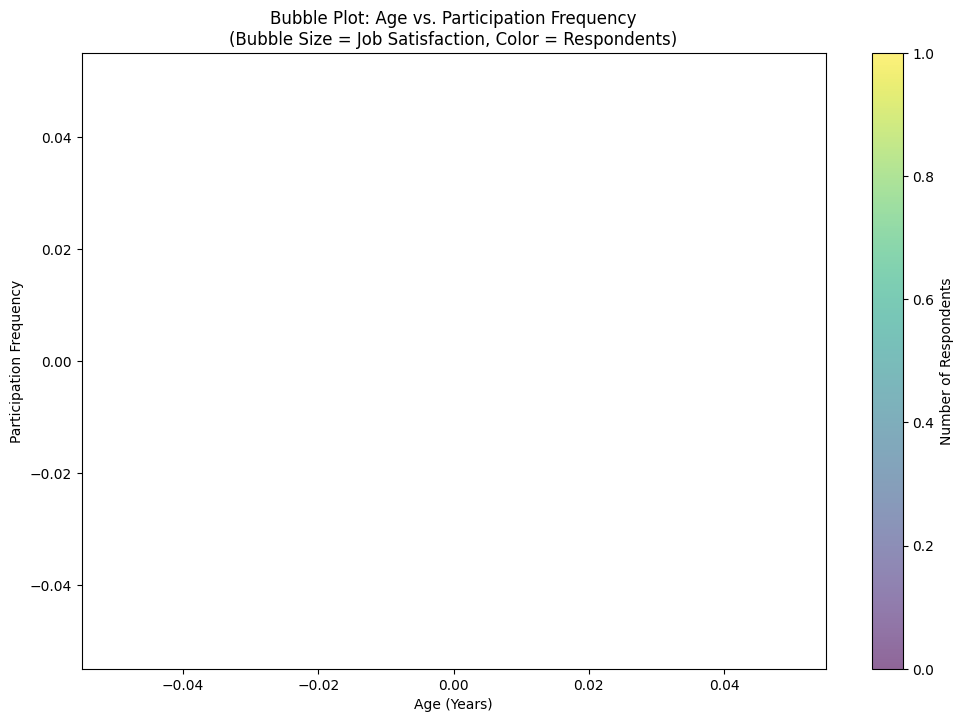

In [3]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT Age, SOPartFreq, JobSat FROM main", conn)
conn.close()

# Map Age ranges to numeric midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Map Job Satisfaction to numeric scale
job_sat_map = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Drop missing values
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSatScore'])

# Group data
bubble_data = df.groupby(['Age', 'SOPartFreq']).agg(
    Respondents=('JobSatScore', 'count'),
    AvgJobSat=('JobSatScore', 'mean')
).reset_index()

# Bubble Plot
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    x=bubble_data['Age'],
    y=bubble_data['SOPartFreq'],
    s=bubble_data['AvgJobSat']*200,   # bubble size ~ job satisfaction
    alpha=0.6,
    c=bubble_data['Respondents'],
    cmap='viridis'
)

plt.title("Bubble Plot: Age vs. Participation Frequency\n(Bubble Size = Job Satisfaction, Color = Respondents)")
plt.xlabel("Age (Years)")
plt.ylabel("Participation Frequency")
plt.colorbar(scatter, label="Number of Respondents")
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


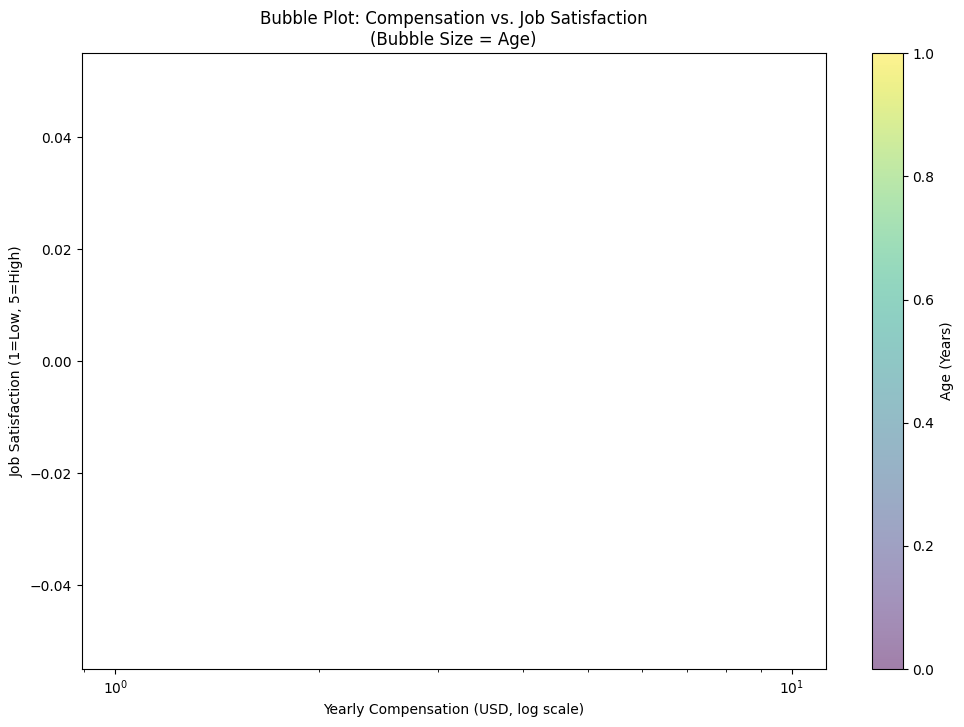

In [4]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT ConvertedCompYearly, JobSat, Age FROM main", conn)
conn.close()

# Map Age ranges to numeric midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['AgeNum'] = df['Age'].map(age_map)

# Map Job Satisfaction to numeric scale
job_sat_map = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatScore', 'AgeNum'])

# Filter unrealistic salaries
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 1_000_000)]

# Bubble Plot
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatScore'],
    s=df['AgeNum']*10,      # bubble size based on age
    alpha=0.5,
    c=df['AgeNum'],
    cmap='viridis'
)

plt.title("Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD, log scale)")
plt.ylabel("Job Satisfaction (1=Low, 5=High)")
plt.xscale('log')  # salaries are skewed
plt.colorbar(scatter, label="Age (Years)")
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



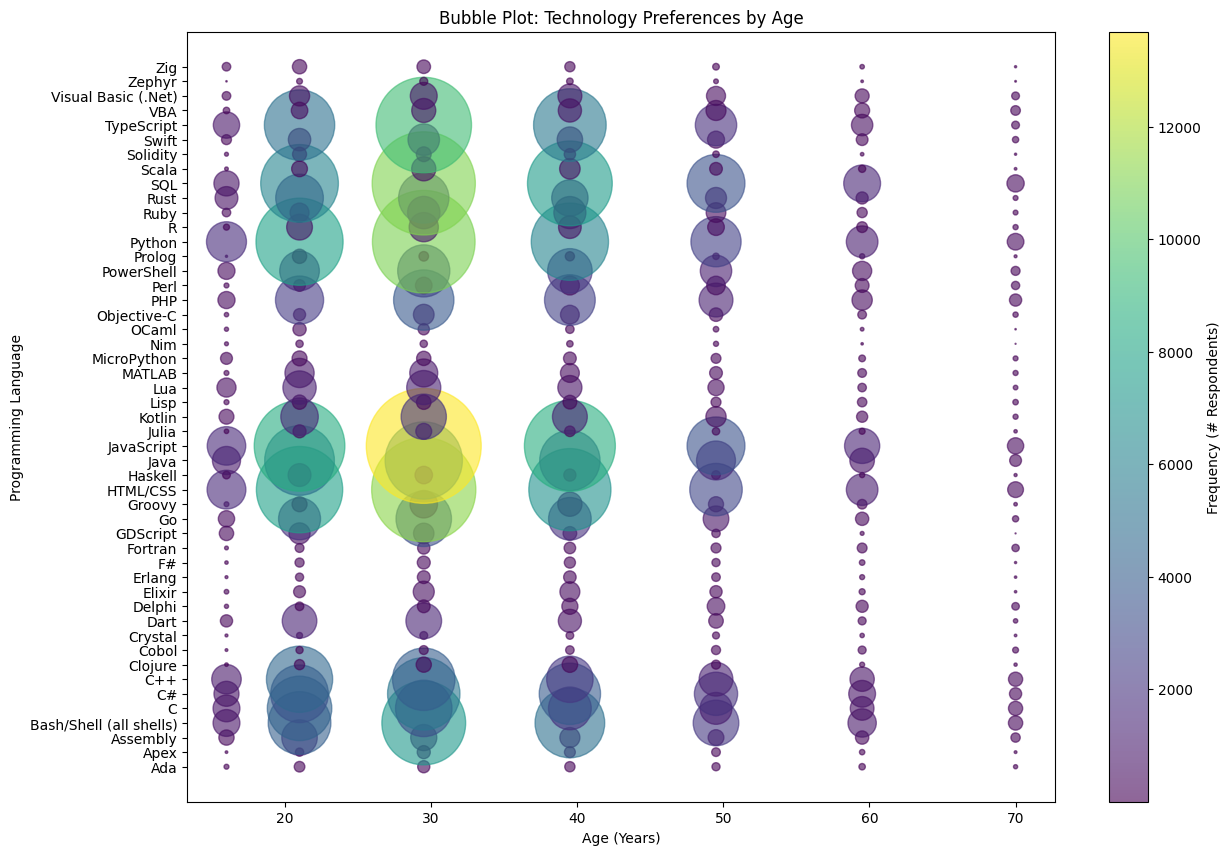

In [5]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT Age, LanguageHaveWorkedWith FROM main", conn)
conn.close()

# Map Age ranges to numeric midpoints
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['AgeNum'] = df['Age'].map(age_map)

# Drop missing
df = df.dropna(subset=['AgeNum','LanguageHaveWorkedWith'])

# Split languages into rows
df_lang = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df_lang['Language'] = df_lang['Language'].str.strip()

# Group by Age + Language
lang_stats = df_lang.groupby(['AgeNum','Language']).size().reset_index(name='Count')

# Bubble Plot
plt.figure(figsize=(14,10))
scatter = plt.scatter(
    x=lang_stats['AgeNum'],
    y=lang_stats['Language'],
    s=lang_stats['Count']*0.5,   # scale bubble size
    c=lang_stats['Count'],
    cmap='viridis',
    alpha=0.6
)

plt.title("Bubble Plot: Technology Preferences by Age")
plt.xlabel("Age (Years)")
plt.ylabel("Programming Language")
plt.colorbar(scatter, label="Frequency (# Respondents)")
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


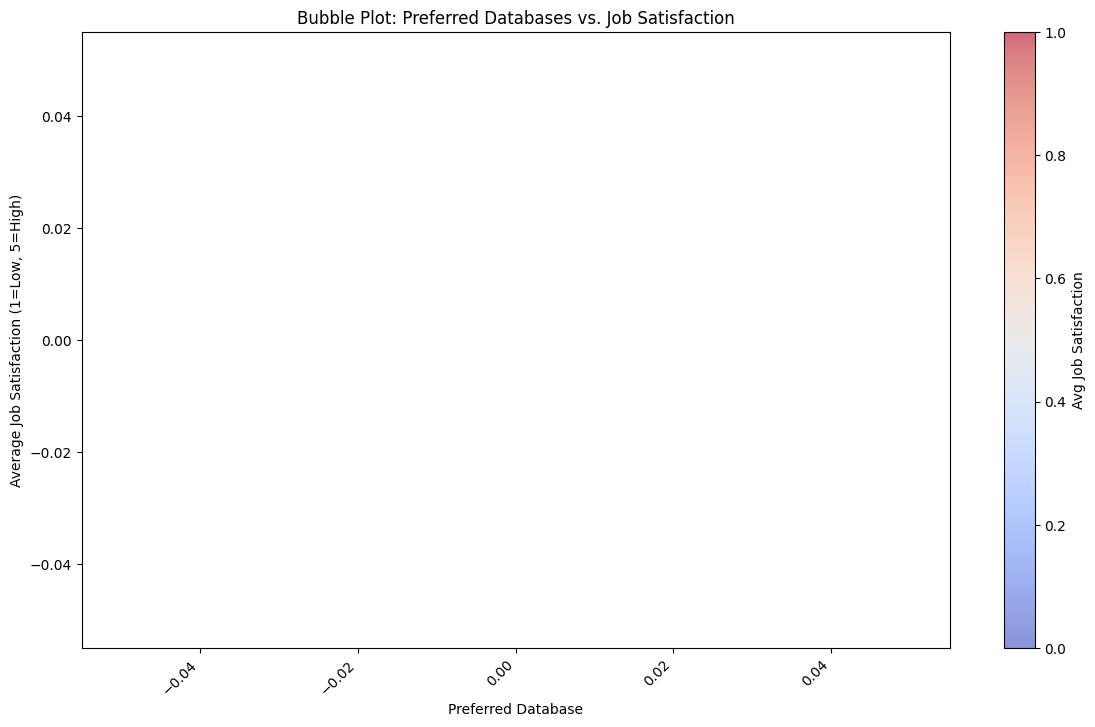

In [6]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT DatabaseWantToWorkWith, JobSat FROM main", conn)
conn.close()

# Map Job Satisfaction to numeric
job_sat_map = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Drop missing
df = df.dropna(subset=['DatabaseWantToWorkWith','JobSatScore'])

# Split databases into rows
df_db = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')
df_db['Database'] = df_db['Database'].str.strip()

# Group by database
db_stats = df_db.groupby('Database').agg(
    AvgJobSat=('JobSatScore','mean'),
    Respondents=('JobSatScore','count')
).reset_index()

# Bubble Plot
plt.figure(figsize=(14,8))
scatter = plt.scatter(
    x=db_stats['Database'],
    y=db_stats['AvgJobSat'],
    s=db_stats['Respondents']*2,   # bubble size = popularity
    c=db_stats['AvgJobSat'],
    cmap='coolwarm',
    alpha=0.6
)

plt.title("Bubble Plot: Preferred Databases vs. Job Satisfaction")
plt.xlabel("Preferred Database")
plt.ylabel("Average Job Satisfaction (1=Low, 5=High)")
plt.xticks(rotation=45, ha="right")
plt.colorbar(scatter, label="Avg Job Satisfaction")
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


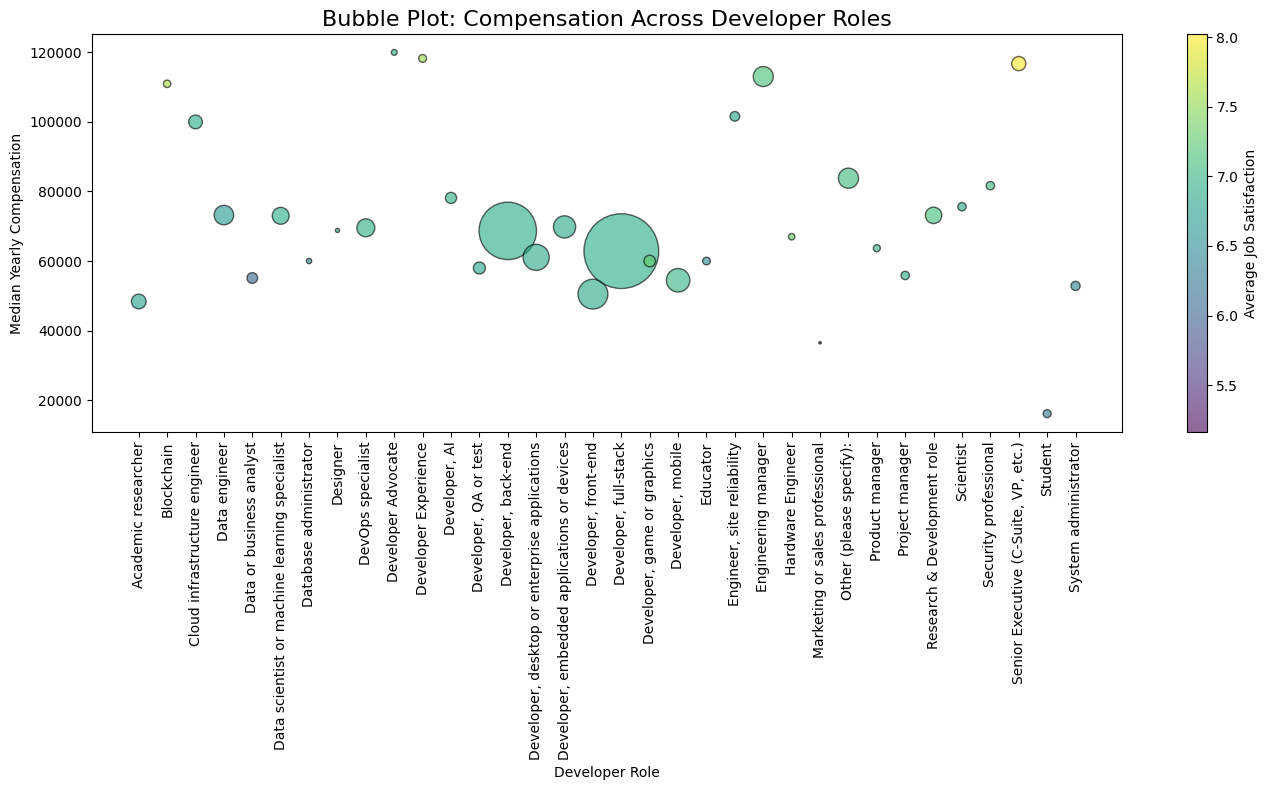

In [12]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect("survey-results-public.sqlite")

# Query relevant columns
query = """
SELECT DevType, ConvertedCompYearly, JobSat
FROM main
WHERE DevType IS NOT NULL AND JobSat IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_roles = pd.read_sql_query(query, conn)

conn.close()

# Ensure numeric conversion
df_roles['ConvertedCompYearly'] = pd.to_numeric(df_roles['ConvertedCompYearly'], errors='coerce')
df_roles['JobSat'] = pd.to_numeric(df_roles['JobSat'], errors='coerce')

# Drop missing or invalid rows
df_roles = df_roles.dropna(subset=['ConvertedCompYearly', 'JobSat'])

# Split multiple roles
df_roles = df_roles.assign(DevType=df_roles['DevType'].str.split(';')).explode('DevType')

# Aggregate by developer role
agg_df = df_roles.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'mean',
    'DevType': 'count'
}).rename(columns={'DevType':'Count'}).reset_index()

# Plot
plt.figure(figsize=(14,8))
scatter = plt.scatter(
    agg_df['DevType'],
    agg_df['ConvertedCompYearly'],
    s=agg_df['Count']*0.5,  # bubble size = number of respondents
    c=agg_df['JobSat'],
    cmap='viridis',
    alpha=0.6,
    edgecolors="k"
)

plt.xticks(rotation=90)
plt.colorbar(scatter, label="Average Job Satisfaction")
plt.title("Bubble Plot: Compensation Across Developer Roles", fontsize=16)
plt.xlabel("Developer Role")
plt.ylabel("Median Yearly Compensation")
plt.tight_layout()
plt.show()





#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


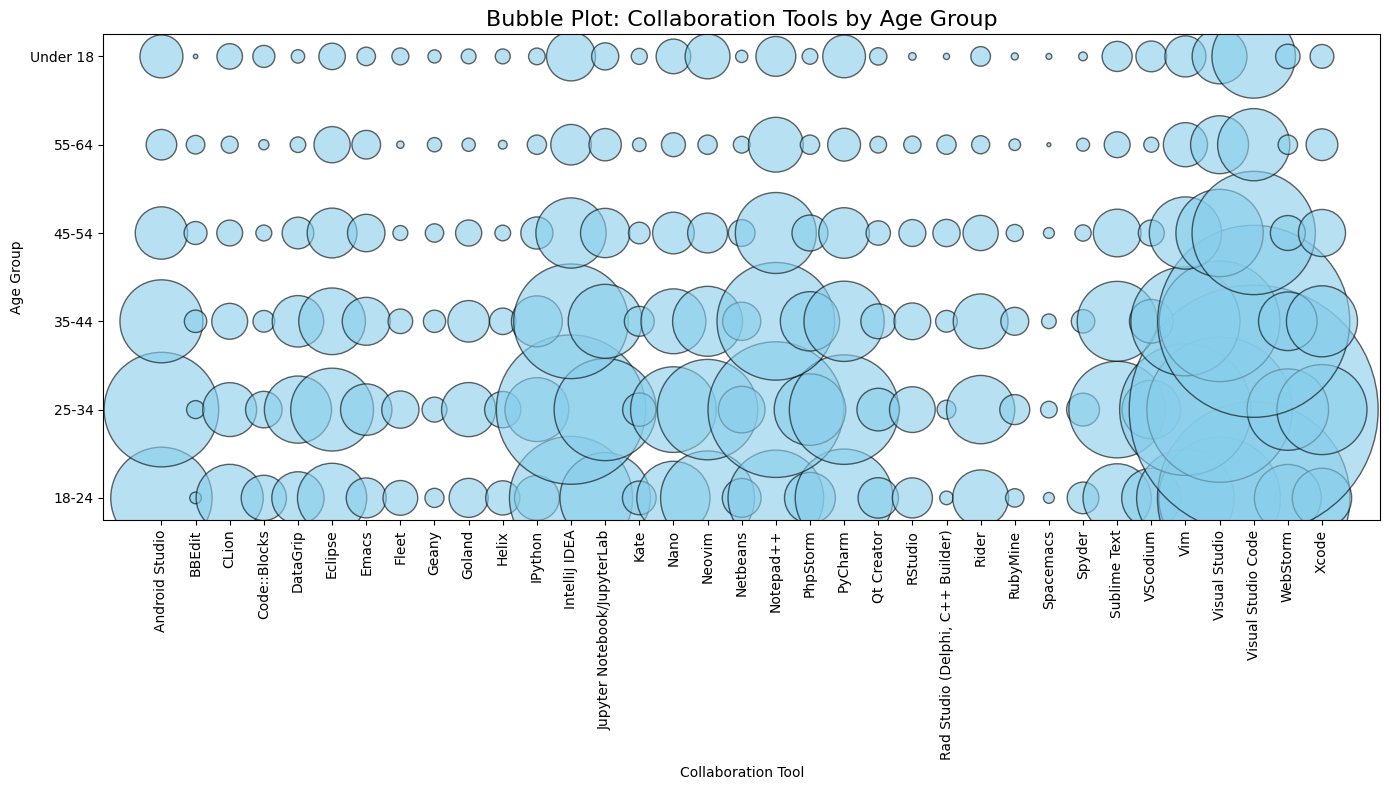

In [13]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect("survey-results-public.sqlite")

# Query collaboration tools and age
query = """
SELECT Age, NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age IS NOT NULL AND NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df_tools = pd.read_sql_query(query, conn)
conn.close()

# Normalize Age values into broader groups
def clean_age(age):
    if "Under 18" in age: return "Under 18"
    elif "18-24" in age: return "18-24"
    elif "25-34" in age: return "25-34"
    elif "35-44" in age: return "35-44"
    elif "45-54" in age: return "45-54"
    elif "55-64" in age: return "55-64"
    elif "65 or older" in age: return "65+"
    else: return None

df_tools['AgeGroup'] = df_tools['Age'].apply(clean_age)

# Split multiple tools (semicolon separated)
df_tools = df_tools.assign(
    NEWCollabToolsHaveWorkedWith=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('NEWCollabToolsHaveWorkedWith')

# Count frequency per tool & age group
agg_df = (
    df_tools.groupby(['AgeGroup','NEWCollabToolsHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
)

# Bubble plot
plt.figure(figsize=(14,8))
scatter = plt.scatter(
    agg_df['NEWCollabToolsHaveWorkedWith'],
    agg_df['AgeGroup'],
    s=agg_df['Count']*2,   # bubble size ~ frequency
    alpha=0.6,
    color="skyblue",
    edgecolors="k"
)

plt.xticks(rotation=90)
plt.title("Bubble Plot: Collaboration Tools by Age Group", fontsize=16)
plt.xlabel("Collaboration Tool")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



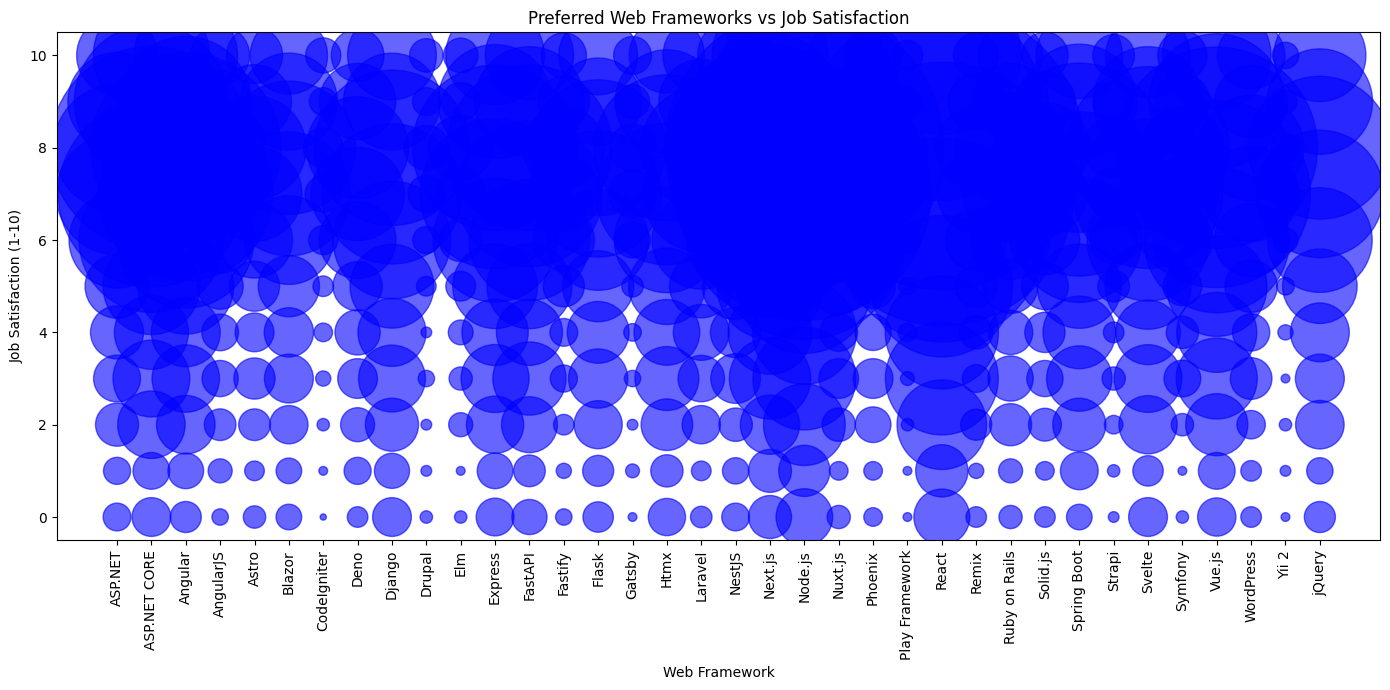

In [16]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Load relevant columns
df = pd.read_sql_query("""
SELECT WebframeWantToWorkWith, JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL
""", conn)

conn.close()

# Drop missing JobSat
df = df.dropna(subset=["JobSat"])

# Split frameworks into rows
df_exploded = df.assign(Webframe=df["WebframeWantToWorkWith"].str.split(";")).explode("Webframe")

# Clean whitespace
df_exploded["Webframe"] = df_exploded["Webframe"].str.strip()

# Count respondents per framework & satisfaction level
counts = df_exploded.groupby(["Webframe", "JobSat"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(14,7))
plt.scatter(
    counts["Webframe"],
    counts["JobSat"],
    s=counts["Count"]*20,  # bubble size
    alpha=0.6,
    c="blue"
)
plt.xticks(rotation=90)
plt.title("Preferred Web Frameworks vs Job Satisfaction")
plt.xlabel("Web Framework")
plt.ylabel("Job Satisfaction (1-10)")
plt.tight_layout()
plt.show()




#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



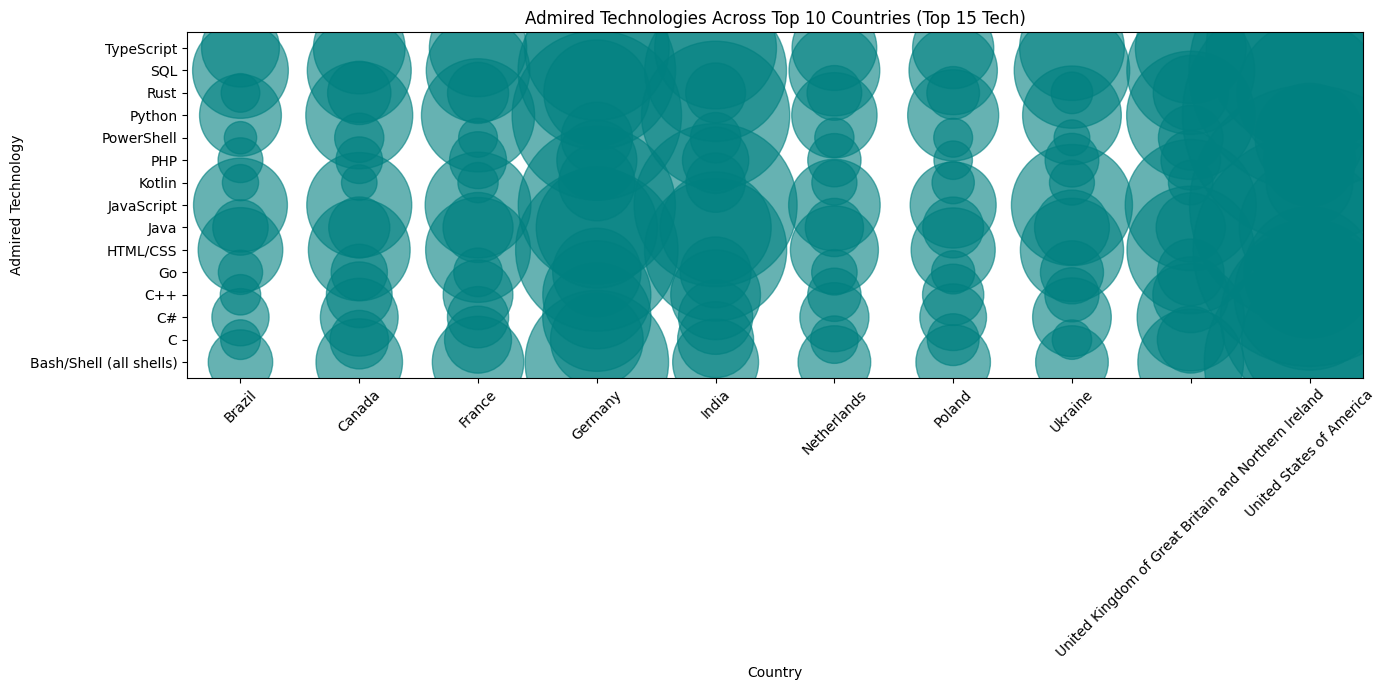

In [18]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Load relevant columns
df = pd.read_sql_query("""
SELECT Country, LanguageAdmired
FROM main
WHERE Country IS NOT NULL AND LanguageAdmired IS NOT NULL
""", conn)

conn.close()

# Split semicolon-separated languages into rows
df_exploded = df.assign(Language=df["LanguageAdmired"].str.split(";")).explode("Language")
df_exploded["Language"] = df_exploded["Language"].str.strip()

# Get top 10 countries
top_countries = df_exploded["Country"].value_counts().nlargest(10).index
df_top = df_exploded[df_exploded["Country"].isin(top_countries)]

# Get top 15 admired languages overall
top_languages = df_exploded["Language"].value_counts().nlargest(15).index
df_top = df_top[df_top["Language"].isin(top_languages)]

# Count frequency of admiration per (Country, Language)
counts = df_top.groupby(["Country", "Language"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(14,7))
plt.scatter(
    counts["Country"],
    counts["Language"],
    s=counts["Count"]*8,
    alpha=0.6,
    c="teal"
)
plt.xticks(rotation=45)
plt.title("Admired Technologies Across Top 10 Countries (Top 15 Tech)")
plt.xlabel("Country")
plt.ylabel("Admired Technology")
plt.tight_layout()
plt.show()



## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
